In [24]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.makedirs('/content/drive/MyDrive/PHYS_260_PROJECT', exist_ok=True)
print("✅ Folder created or already exists.")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Folder created or already exists.


In [26]:
np.save('/content/drive/MyDrive/PHYS_260_PROJECT/X_balanced.npy', X_balanced)
np.save('/content/drive/MyDrive/PHYS_260_PROJECT/y_balanced.npy', y_balanced)
print("✅ Data saved successfully to Google Drive.")

✅ Data saved successfully to Google Drive.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Loaded data from Drive.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


📈 Starting training...

Epoch 1/15
552/552 - 189s - 343ms/step - accuracy: 0.5495 - loss: 0.9118 - val_accuracy: 0.5952 - val_loss: 0.8392
Epoch 2/15
552/552 - 201s - 365ms/step - accuracy: 0.6193 - loss: 0.8053 - val_accuracy: 0.6639 - val_loss: 0.7415
Epoch 3/15
552/552 - 185s - 336ms/step - accuracy: 0.6681 - loss: 0.7145 - val_accuracy: 0.7095 - val_loss: 0.6445
Epoch 4/15
552/552 - 203s - 368ms/step - accuracy: 0.7020 - loss: 0.6459 - val_accuracy: 0.7344 - val_loss: 0.5936
Epoch 5/15
552/552 - 197s - 358ms/step - accuracy: 0.7187 - loss: 0.6078 - val_accuracy: 0.7424 - val_loss: 0.5638
Epoch 6/15
552/552 - 206s - 374ms/step - accuracy: 0.7305 - loss: 0.5823 - val_accuracy: 0.7473 - val_loss: 0.5473
Epoch 7/15
552/552 - 179s - 325ms/step - accuracy: 0.7391 - loss: 0.5630 - val_accuracy: 0.7558 - val_loss: 0.5329
Epoch 8/15
552/552 - 207s - 375ms/step - accuracy: 0.7454 - loss: 0.5497 - val_accuracy: 0.7585 - val_loss: 0.5264
Epoch 9/15
552/552 - 205s - 370ms/step - accuracy: 0.750

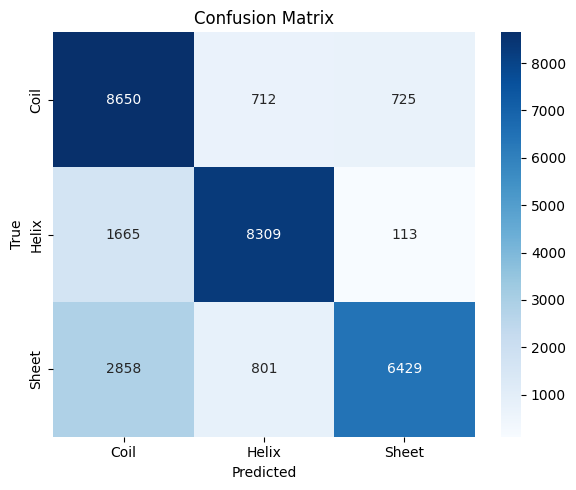

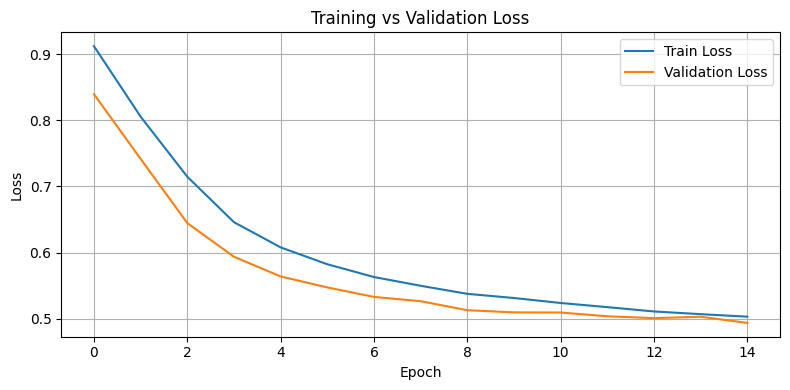

In [28]:
#  Upload preprocessed files
from google.colab import drive
drive.mount('/content/drive')  # Upload X_balanced.npy and y_balanced.npy

#  Imports
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#  Load data
X_balanced = np.load('/content/drive/MyDrive/PHYS_260_PROJECT/X_balanced.npy')
y_balanced = np.load('/content/drive/MyDrive/PHYS_260_PROJECT/y_balanced.npy')
print("✅ Loaded data from Drive.")




#  Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

#  OOP CNN Model
class ProteinCNNModel:
    def __init__(self, input_shape=(509, 1), num_classes=3):
        self.input_shape = input_shape
        self.num_classes = num_classes
        self.model = self._build_model()

    def _build_model(self):
        model = keras.Sequential([
            layers.Conv1D(128, kernel_size=7, activation='relu', input_shape=self.input_shape),
            layers.MaxPooling1D(pool_size=2),
            layers.Dropout(0.3),

            layers.Conv1D(64, kernel_size=3, activation='relu'),
            layers.MaxPooling1D(pool_size=2),
            layers.Dropout(0.3),

            layers.Flatten(),
            layers.Dense(128, activation='relu'),
            layers.Dropout(0.3),
            layers.Dense(self.num_classes, activation='softmax')
        ])

        model.compile(
            optimizer=keras.optimizers.Adam(learning_rate=1e-3),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )
        return model

    def train(self, X_train, y_train, X_val, y_val, epochs=15, batch_size=128):
        print("📈 Starting training...\n")
        self.history = self.model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=epochs,
            batch_size=batch_size,
            verbose=2
        )
        return self.history

    def evaluate(self, X_test, y_test):
        print("\n🧪 Evaluating model...")
        loss, accuracy = self.model.evaluate(X_test, y_test, verbose=0)
        print(f"✅ Test Accuracy: {accuracy * 100:.2f}%")
        return loss, accuracy

    def predict_and_report(self, X_test, y_test):
        print("\n📋 Classification Report:")
        y_pred = np.argmax(self.model.predict(X_test), axis=1)
        print(classification_report(y_test, y_pred, digits=4))

        print("\n📊 Confusion Matrix:")
        plt.figure(figsize=(6, 5))
        sns.heatmap(
            confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['Coil', 'Helix', 'Sheet'],
            yticklabels=['Coil', 'Helix', 'Sheet']
        )
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.title("Confusion Matrix")
        plt.tight_layout()
        plt.show()

    def plot_loss(self):
        plt.figure(figsize=(8, 4))
        plt.plot(self.history.history['loss'], label='Train Loss')
        plt.plot(self.history.history['val_loss'], label='Validation Loss')
        plt.title("Training vs Validation Loss")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


#  Run Model
cnn_model = ProteinCNNModel()
cnn_model.train(X_train, y_train, X_test, y_test)
cnn_model.evaluate(X_test, y_test)
cnn_model.predict_and_report(X_test, y_test)
cnn_model.plot_loss()



Saving CB513.npy to CB513.npy


<ipython-input-15-3ed04fd73661>:9: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  cb513 = np.load("CB513.npy", allow_pickle=True)


X shape: (39900, 509)
y shape: (39900,)
Class counts: {np.int64(0): np.int64(33624), np.int64(1): np.int64(2874), np.int64(2): np.int64(3402)}
✅ Final shapes:
X_balanced: (100872, 509, 1)
y_balanced: (100872,)
Final class counts: {np.int64(0): np.int64(33624), np.int64(1): np.int64(33624), np.int64(2): np.int64(33624)}


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving CB513.npy to CB513 (1).npy


<ipython-input-9-45b06b076170>:18: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  cb513 = np.load("CB513.npy", allow_pickle=True)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 505, 64)             │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 252, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 252, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16128)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,064,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,065,283 (7.88 MB)

 Trainable params: 2,065,283 (7.88 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
552/552 ━━━━━━━━━━━━━━━━━━━━ 78s 138ms/step - accuracy: 0.5212 - loss: 0.9588 - val_accuracy: 0.6205 - val_loss: 0.8172
Epoch 2/15
552/552 ━━━━━━━━━━━━━━━━━━━━ 77s 130ms/step - accuracy: 0.6224 - loss: 0.7988 - val_accuracy: 0.6799 - val_loss: 0.7089
Epoch 3/15
552/552 ━━━━━━━━━━━━━━━━━━━━ 87s 138ms/step - accuracy: 0.6733 - loss: 0.7037 - val_accuracy: 0.7141 - val_loss: 0.6415
Epoch 4/15
552/552 ━━━━━━━━━━━━━━━━━━━━ 77s 130ms/step - accuracy: 0.6982 - loss: 0.6549 - val_accuracy: 0.7270 - val_loss: 0.6082
Epoch 5/15
552/552 ━━━━━━━━━━━━━━━━━━━━ 72s 130ms/step - accuracy: 0.7141 - loss: 0.6176 - val_accuracy: 0.7379 - val_loss: 0.5847
Epoch 6/15
552/552 ━━━━━━━━━━━━━━━━━━━━ 90s 144ms/step - accuracy: 0.7252 - loss: 0.5954 - val_accuracy: 0.7477 - val_loss: 0.5630
Epoch 7/15
552/552 ━━━━━━━━━━━━━━━━━━━━ 79s 139ms/step - accuracy: 0.7305 - loss: 0.5802 - val_accuracy: 0.7482 - val_loss: 0.5530
Epoch 8/15
552/552 ━━━━━━━━━━━━━━━━━━━━ 81s 138ms/step - accuracy: 0.7352 - loss: 0

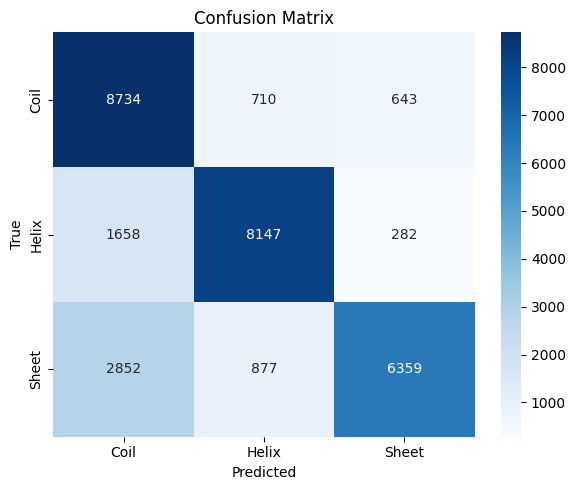

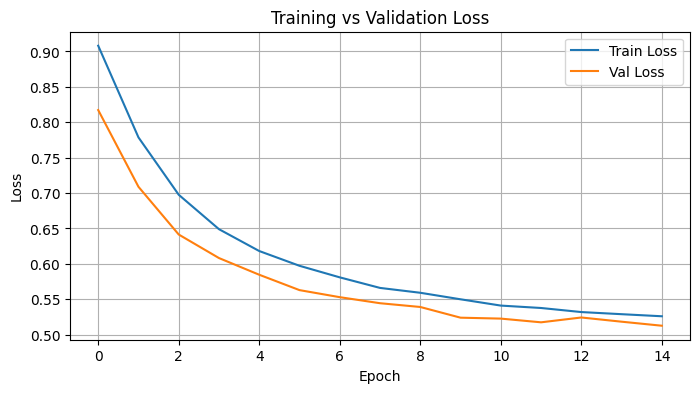

In [9]:
# Install necessary packages
!pip install -q tensorflow scikit-learn seaborn

#  Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from google.colab import files

#  Upload CB513 file
uploaded = files.upload()
cb513 = np.load("CB513.npy", allow_pickle=True)

# 🧹 Extract features + labels
X = cb513[:509].T  # (39900, 509)
y = np.round(cb513[513] * 2).astype(int)

# 🧪 Oversample to balance classes
X_0, X_1, X_2 = X[y==0], X[y==1], X[y==2]
y_0, y_1, y_2 = y[y==0], y[y==1], y[y==2]
X_1_up, y_1_up = resample(X_1, y_1, replace=True, n_samples=len(y_0), random_state=42)
X_2_up, y_2_up = resample(X_2, y_2, replace=True, n_samples=len(y_0), random_state=42)
X_balanced = np.vstack([X_0, X_1_up, X_2_up])
y_balanced = np.concatenate([y_0, y_1_up, y_2_up])

# 🔀 Shuffle
idx = np.random.permutation(len(y_balanced))
X_balanced, y_balanced = X_balanced[idx], y_balanced[idx]

# 📐 Reshape for CNN
X_balanced = X_balanced[..., np.newaxis]  # Shape: (samples, 509, 1)

# 📊 Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, stratify=y_balanced, random_state=42)

# 🧠 FNN model
model = keras.Sequential([
    layers.Conv1D(64, 5, activation='relu', input_shape=(509, 1)),
    layers.MaxPooling1D(2),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(3, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# 🚀 Train
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=128)

# 📈 Evaluate
loss, acc = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {acc*100:.2f}%")

# 🔮 Predict and classify
y_pred = np.argmax(model.predict(X_test), axis=1)

# 🧾 Report
print("\n📋 Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

# 📉 Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Coil','Helix','Sheet'], yticklabels=['Coil','Helix','Sheet'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

# 📊 Loss Plot
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()
